<span style='color:blue'>Importamos los módulos

In [1]:
import sys, numpy as np, pandas as pd, matplotlib.pyplot as plt, _pickle
from sklearn.cluster import KMeans

<span style='color:blue'>Anonimizamos la muestra (los ficheros originales no se suben al repositorio público)

In [2]:
# data1 = pd.read_csv('Formulario_uni3.csv',
# names=['timestamp', 'name'] + list(range(50)), skiprows = [0])
# data2 = pd.read_csv('Parecidos razonables.csv',
# names=['timestamp', 'name'] + list(range(50)), skiprows = [0]).drop(7, axis=0)
# data = pd.concat([data1, data2])
# data = data.reset_index(drop=True)
# data['name'] = [str(i+1).zfill(4) for i in list(data.index)]
# data.to_csv('muestra_total.csv', index=False)

<span style='color:blue'>Cargamos la muestra anonimizada

In [3]:
data = pd.read_csv('muestra_total.csv', dtype={'name': str})
data.head()

,timestamp,name,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,2021/01/17 3:58:16 p. m. CET,0001,4,1,3,5,2,3,1,4,...,1,3,2,4,5,5,3,4,2,1
1,2021/01/17 4:25:53 p. m. CET,0002,1,4,3,5,2,4,2,5,...,2,3,1,5,4,4,1,5,3,2
2,2021/01/17 4:50:36 p. m. CET,0003,1,3,2,4,5,4,2,5,...,2,5,1,3,4,4,1,3,2,5
3,2021/01/17 5:10:21 p. m. CET,0004,2,4,5,1,3,2,3,4,...,5,3,4,2,1,5,4,3,2,1
4,2021/01/17 5:38:42 p. m. CET,0005,3,1,2,4,5,3,5,2,...,5,4,3,2,1,4,2,3,1,5


<span style='color:blue'>Ponemos el signo del zodiaco clásico (en aquellos en los que me se su cumpleaños)

In [4]:
data['signo'] = np.where(data['name'].isin(['0004', '0007', '0008', '0024']), 'Geminis', 0)
data['signo'] = np.where(data['name'].isin(['0014', '0022', '0018']), 'Cancer', data['signo'])
data['signo'] = np.where(data['name'].isin(['0011', '0013']), 'Escorpio', data['signo'])
data['signo'] = np.where(data['name'].isin(['0016']), 'Libra', data['signo'])
data['signo'] = np.where(data['name'].isin(['0023', '0015', '0017']), 'Acuario', data['signo'])
data['signo'] = np.where(data['name'].isin(['0001']), 'Aries', data['signo'])
data['signo'] = np.where(data['name'].isin(['0012', '0021', '0003']), 'Virgo', data['signo'])
data['signo'] = np.where(data['name'].isin(['0025', '0006', '0020']), 'Leo', data['signo'])

<span style='color:blue'>Seleccionamos las columnas de entrenamiento, excluyendo las marcas temporales y el signo del zodiáco clásico

In [5]:
X = data[data.columns[1:-1]].set_index('name')
total_formularios = X.shape[0]

<span style='color:blue'>Para cada posible valor del número de grupos, calculamos el error y la distribución de cada grupo

In [6]:
error_para_k, distri_para_k = {}, {}

for i in range(6): 
    kmeans_sim = KMeans(n_clusters=i+2, random_state=123).fit(X)
    error_para_k[i+2] = kmeans_sim.inertia_
    distri_para_k[i+2] =  dict(pd.DataFrame(kmeans_sim.labels_)[0].value_counts())

<span style='color:blue'>Miramos la distribución en función al número de grupos

In [7]:
distri_para_k

{2: {0: 23, 1: 3},
 3: {0: 12, 1: 11, 2: 3},
 4: {0: 13, 3: 7, 1: 3, 2: 3},
 5: {1: 9, 4: 8, 3: 5, 0: 3, 2: 1},
 6: {3: 7, 1: 6, 0: 5, 4: 4, 2: 3, 5: 1},
 7: {1: 8, 3: 6, 2: 3, 4: 3, 6: 2, 0: 2, 5: 2}}

<span style='color:blue'>Y el error cometido para cada valor de k

In [8]:
error_para_k

{2: 1573.855072463768,
 3: 1447.5454545454545,
 4: 1339.4139194139195,
 5: 1231.5166666666667,
 6: 1165.0047619047618,
 7: 1077.6666666666665}

<span style='color:blue'>Pintamos la grádica del error en función al número de grupos

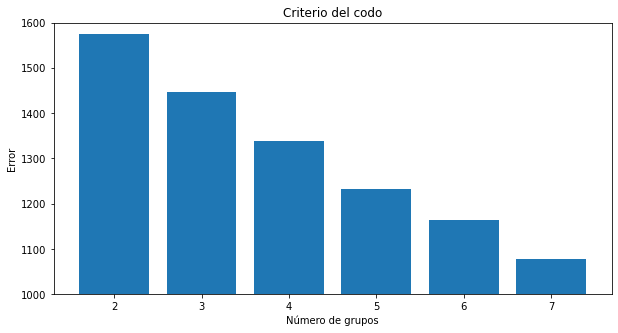

In [9]:
numero_grupos = list(error_para_k.keys()) 
error_asociado = list(error_para_k.values()) 
   
plt.figure(figsize = (10, 5))
plt.ylim([1000, 1600])
plt.bar(numero_grupos, error_asociado)

  
plt.xlabel('Número de grupos') 
plt.ylabel('Error') 
plt.title('Criterio del codo')

plt.show()

<span style='color:blue'>Decidimos que el número de nuevos grupos zodiacales debe ser 4

In [10]:
n_clusters = 4

kmeans_sim = KMeans(n_clusters=n_clusters, random_state=123).fit(X)
resultados_sim = pd.DataFrame({'Grupo': kmeans_sim.labels_})

resultado = pd.DataFrame({'grupo': kmeans_sim.labels_}, index=X.index)

<span style='color:blue'>Tipo 0

In [11]:
resultado[resultado.grupo == 0]

,grupo
name,
0002,0
0003,0
0010,0
0012,0
0013,0
0015,0
0016,0
0017,0
0018,0


<span style='color:blue'>Tipo 1

In [12]:
resultado[resultado.grupo == 1]

,grupo
name,
0005,1
0006,1
0009,1


<span style='color:blue'>Tipo 2

In [13]:
resultado[resultado.grupo == 2]

,grupo
name,
0011,2
0020,2
0021,2


<span style='color:blue'>Tipo 3

In [14]:
resultado[resultado.grupo == 3]

,grupo
name,
0001,3
0004,3
0007,3
0008,3
0014,3
0022,3
0023,3


<span style='color:blue'>Guardo el modelo

In [15]:
pickle_file = open('modelo_zodiac.pckl', 'wb')
_pickle.dump(kmeans_sim, pickle_file)
pickle_file.close()